In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import warnings
warnings.filterwarnings('ignore')
import matplotlib.dates as mdates
import datetime as dt

df_train = pd.read_csv('data/train.csv')
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [2]:
# 12월 25일을 기준으로 7일 전후로의 매출 변화 연도별! 13, 14, 15, 16년도
# 크리스마스 기간 12월 18일~12월 30일 동안의 매출 변화 13, 14, 15, 16년도
# 11월 25일~1월 25일 동안의 매출 변화 13, 14, 15, 16년도

In [3]:
store = pd.read_csv('data/stores.csv')
store.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [4]:
df_merge = pd.merge(df_train, store, how='left')
df_merge

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6


In [5]:
import datetime
df_merge['date'] = pd.to_datetime(df_merge['date'])
df_merge['year'] = df_merge['date'].dt.year
df_merge['month'] = df_merge['date'].dt.month
df_merge["year_month"] = df_merge['year'].astype(str) + '-' + df_merge['month'].astype(str)
df_merge.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,year,month,year_month
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,2013,1,2013-1
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,2013,1,2013-1
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,2013,1,2013-1
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,2013,1,2013-1
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,2013,1,2013-1


In [6]:
# Quito 지역 데이터
df_Quito = df_merge[df_merge['city'] == 'Quito']
df_Quito.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,year,month,year_month
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,2013,1,2013-1
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,2013,1,2013-1
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,2013,1,2013-1
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,2013,1,2013-1
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,2013,1,2013-1


In [7]:
df_Quito['date'][:2], df_Quito['date'][-2:]

(0   2013-01-01
 1   2013-01-01
 Name: date, dtype: datetime64[ns],
 3000886   2017-08-15
 3000887   2017-08-15
 Name: date, dtype: datetime64[ns])

In [8]:
df_2013 = df_Quito[df_Quito['year'] == 2013]
df_2013.head(3)

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,year,month,year_month
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,2013,1,2013-1
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,2013,1,2013-1
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,2013,1,2013-1


In [9]:
df_2014 = df_Quito[df_Quito['year'] == 2014]
df_2014.head(3)

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,year,month,year_month
648648,648648,2014-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,2014,1,2014-1
648649,648649,2014-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,2014,1,2014-1
648650,648650,2014-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,2014,1,2014-1


In [10]:
df_2015 = df_Quito[df_Quito['year'] == 2015]
df_2015.head(3)

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,year,month,year_month
1297296,1297296,2015-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,2015,1,2015-1
1297297,1297297,2015-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,2015,1,2015-1
1297298,1297298,2015-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,2015,1,2015-1


In [11]:
df_2016 = df_Quito[df_Quito['year'] == 2016]
df_2016.head(3)

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,year,month,year_month
1945944,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,2016,1,2016-1
1945945,1945945,2016-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,2016,1,2016-1
1945946,1945946,2016-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,2016,1,2016-1


## 크리스마스 기간(12.18~12.25) 동안의 매출 변화
### 2013년

In [12]:
df_2013.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,year,month,year_month
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,2013,1,2013-1
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,2013,1,2013-1
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,2013,1,2013-1
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,2013,1,2013-1
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,2013,1,2013-1


In [13]:
df_2013[(df_2013['year_month'] == '2013-11') | (df_2013['year_month'] == '2013-12')]

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,year,month,year_month
541728,541728,2013-11-01,1,AUTOMOTIVE,3.00000,0,Quito,Pichincha,D,13,2013,11,2013-11
541729,541729,2013-11-01,1,BABY CARE,0.00000,0,Quito,Pichincha,D,13,2013,11,2013-11
541730,541730,2013-11-01,1,BEAUTY,0.00000,0,Quito,Pichincha,D,13,2013,11,2013-11
541731,541731,2013-11-01,1,BEVERAGES,990.00000,0,Quito,Pichincha,D,13,2013,11,2013-11
541732,541732,2013-11-01,1,BOOKS,0.00000,0,Quito,Pichincha,D,13,2013,11,2013-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
648643,648643,2013-12-31,9,POULTRY,719.53503,0,Quito,Pichincha,B,6,2013,12,2013-12
648644,648644,2013-12-31,9,PREPARED FOODS,103.06000,0,Quito,Pichincha,B,6,2013,12,2013-12
648645,648645,2013-12-31,9,PRODUCE,0.00000,0,Quito,Pichincha,B,6,2013,12,2013-12
648646,648646,2013-12-31,9,SCHOOL AND OFFICE SUPPLIES,0.00000,0,Quito,Pichincha,B,6,2013,12,2013-12


<Axes: xlabel='year_month'>

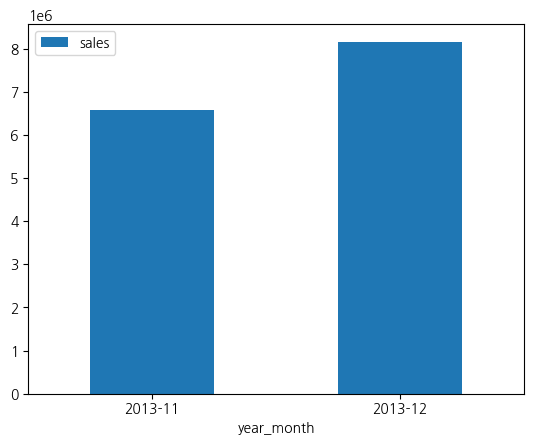

In [14]:
df_2013[(df_2013['year_month'] == '2013-11') | (df_2013['year_month'] == '2013-12')].groupby('year_month')[['sales']].sum().plot.bar(rot=0)

In [15]:
idx_2013 = df_2013[df_2013['date'] == '2013-12-18'].index[0]
idx_2014 = df_2014[df_2014['date'] == '2014-12-18'].index[0]
idx_2015 = df_2015[df_2015['date'] == '2015-12-18'].index[0]
idx_2016 = df_2016[df_2016['date'] == '2016-12-18'].index[0]

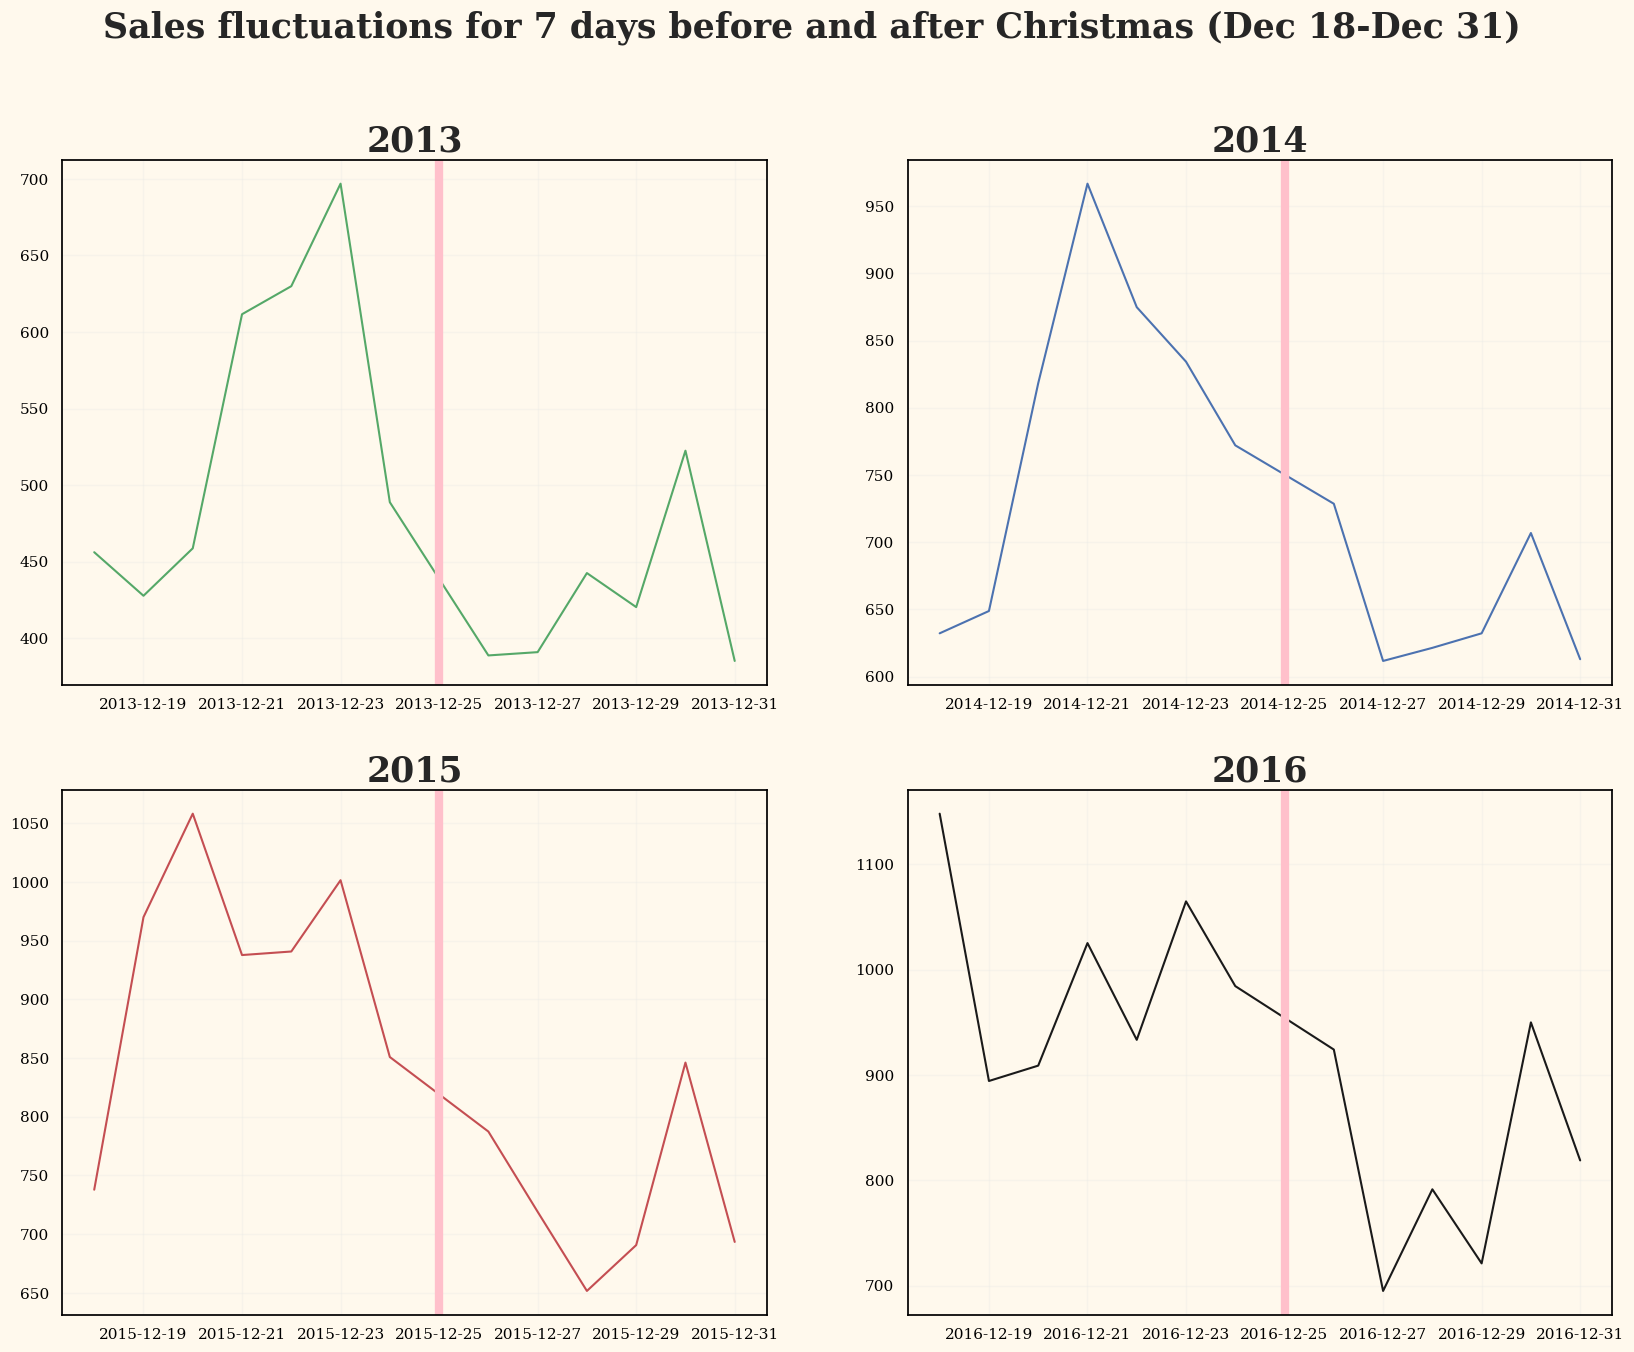

In [16]:
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

plt.subplots(nrows=2, ncols=2, figsize=(20, 15), gridspec_kw={'height_ratios': [2, 2], 'width_ratios': [2, 2]})
                         
plt.subplot(2,2,1)
plt.plot(df_2013[df_2013['id'] >= idx_2013].groupby('date')[['sales']].mean(), 'g')
plt.title('2013', fontweight='bold', fontsize=25)
x_value = mdates.date2num(dt.datetime(2013, 12, 25))
plt.axvline(x=x_value, linewidth=6, color='pink', linestyle='-')

plt.subplot(2,2,2)
plt.plot(df_2014[df_2014['id'] >= idx_2014].groupby('date')[['sales']].mean(), 'b')
plt.title('2014', fontweight='bold', fontsize=25)
x_value = mdates.date2num(dt.datetime(2014, 12, 25))
plt.axvline(x=x_value, linewidth=6, color='pink', linestyle='-')

plt.subplot(2,2,3)
plt.plot(df_2015[df_2015['id'] >= idx_2015].groupby('date')[['sales']].mean(), 'r')
plt.title('2015', fontweight='bold', fontsize=25)
x_value = mdates.date2num(dt.datetime(2015, 12, 25))
plt.axvline(x=x_value, linewidth=6, color='pink', linestyle='-')

plt.subplot(2,2,4)
plt.plot(df_2016[df_2016['id'] >= idx_2016].groupby('date')[['sales']].mean(), 'k')
plt.title('2016', fontweight='bold', fontsize=25)
x_value = mdates.date2num(dt.datetime(2016, 12, 25))
plt.axvline(x=x_value, linewidth=6, color='pink', linestyle='-')

plt.suptitle('Sales fluctuations for 7 days before and after Christmas (Dec 18-Dec 31)', fontweight='bold', fontsize=25)
plt.show()

In [17]:
df_total = pd.concat([df_2013[df_2013['id'] >= idx_2013].groupby('date')[['sales']].mean(), df_2014[df_2014['id'] >= idx_2014].groupby('date')[['sales']].mean()])
df_total = pd.concat([df_total, df_2015[df_2015['id'] >= idx_2015].groupby('date')[['sales']].mean()])
df_total = pd.concat([df_total, df_2016[df_2016['id'] >= idx_2016].groupby('date')[['sales']].mean()])
df_total.shape

(52, 1)

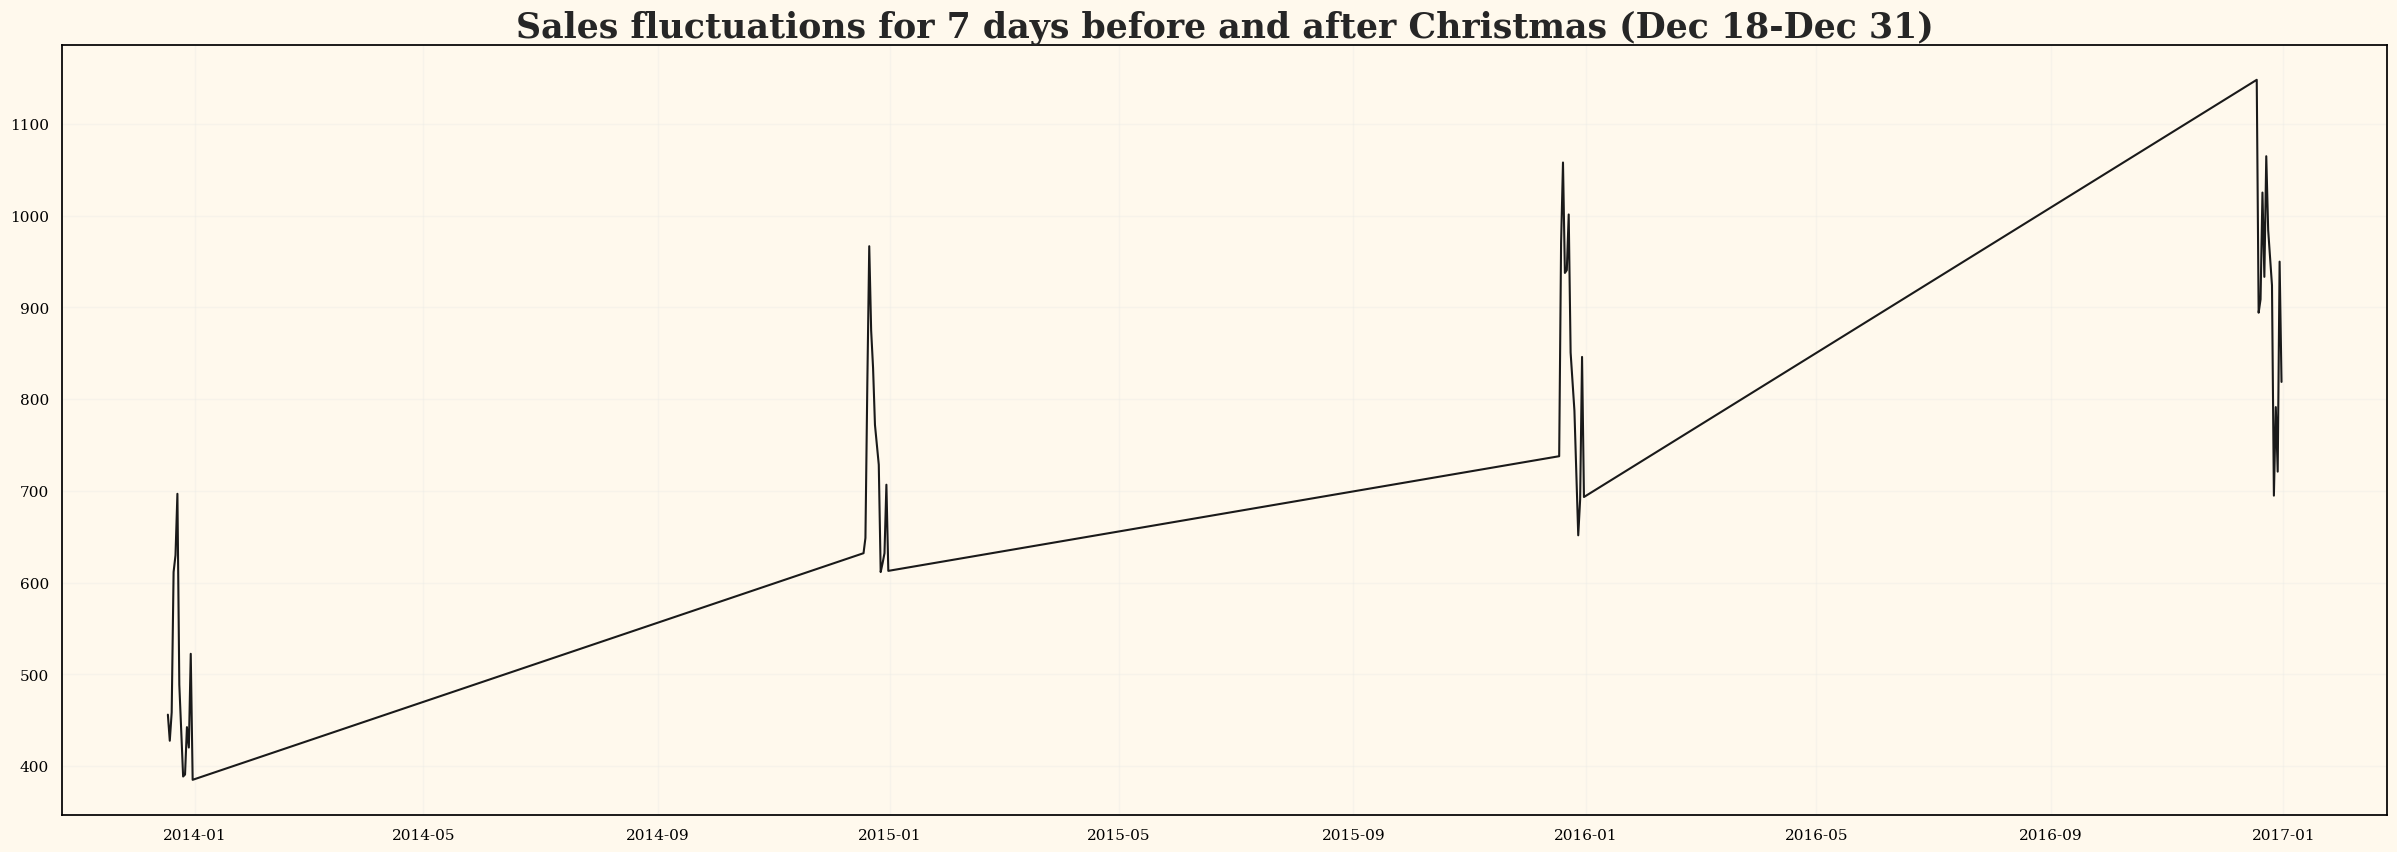

In [18]:
plt.figure(figsize=(30,10))
plt.plot(df_total, 'k')
plt.title('Sales fluctuations for 7 days before and after Christmas (Dec 18-Dec 31)', fontweight='bold', fontsize=25)
plt.show()

## 크리스마스 전후 한 달(11.25~1.25) 동안의 매출 변화

In [19]:
idx_2013_1125 = df_Quito[df_Quito['date'] == '2013-11-25'].index[0]
idx_2014_0125 = df_Quito[df_Quito['date'] == '2014-01-25'].index[-1]

idx_2014_1125 = df_Quito[df_Quito['date'] == '2014-11-25'].index[0]
idx_2015_0125 = df_Quito[df_Quito['date'] == '2015-01-25'].index[-1]

idx_2015_1125 = df_Quito[df_Quito['date'] == '2015-11-25'].index[0]
idx_2016_0125 = df_Quito[df_Quito['date'] == '2016-01-25'].index[-1]

idx_2016_1125 = df_Quito[df_Quito['date'] == '2016-11-25'].index[0]
idx_2017_0125 = df_Quito[df_Quito['date'] == '2017-01-25'].index[-1]

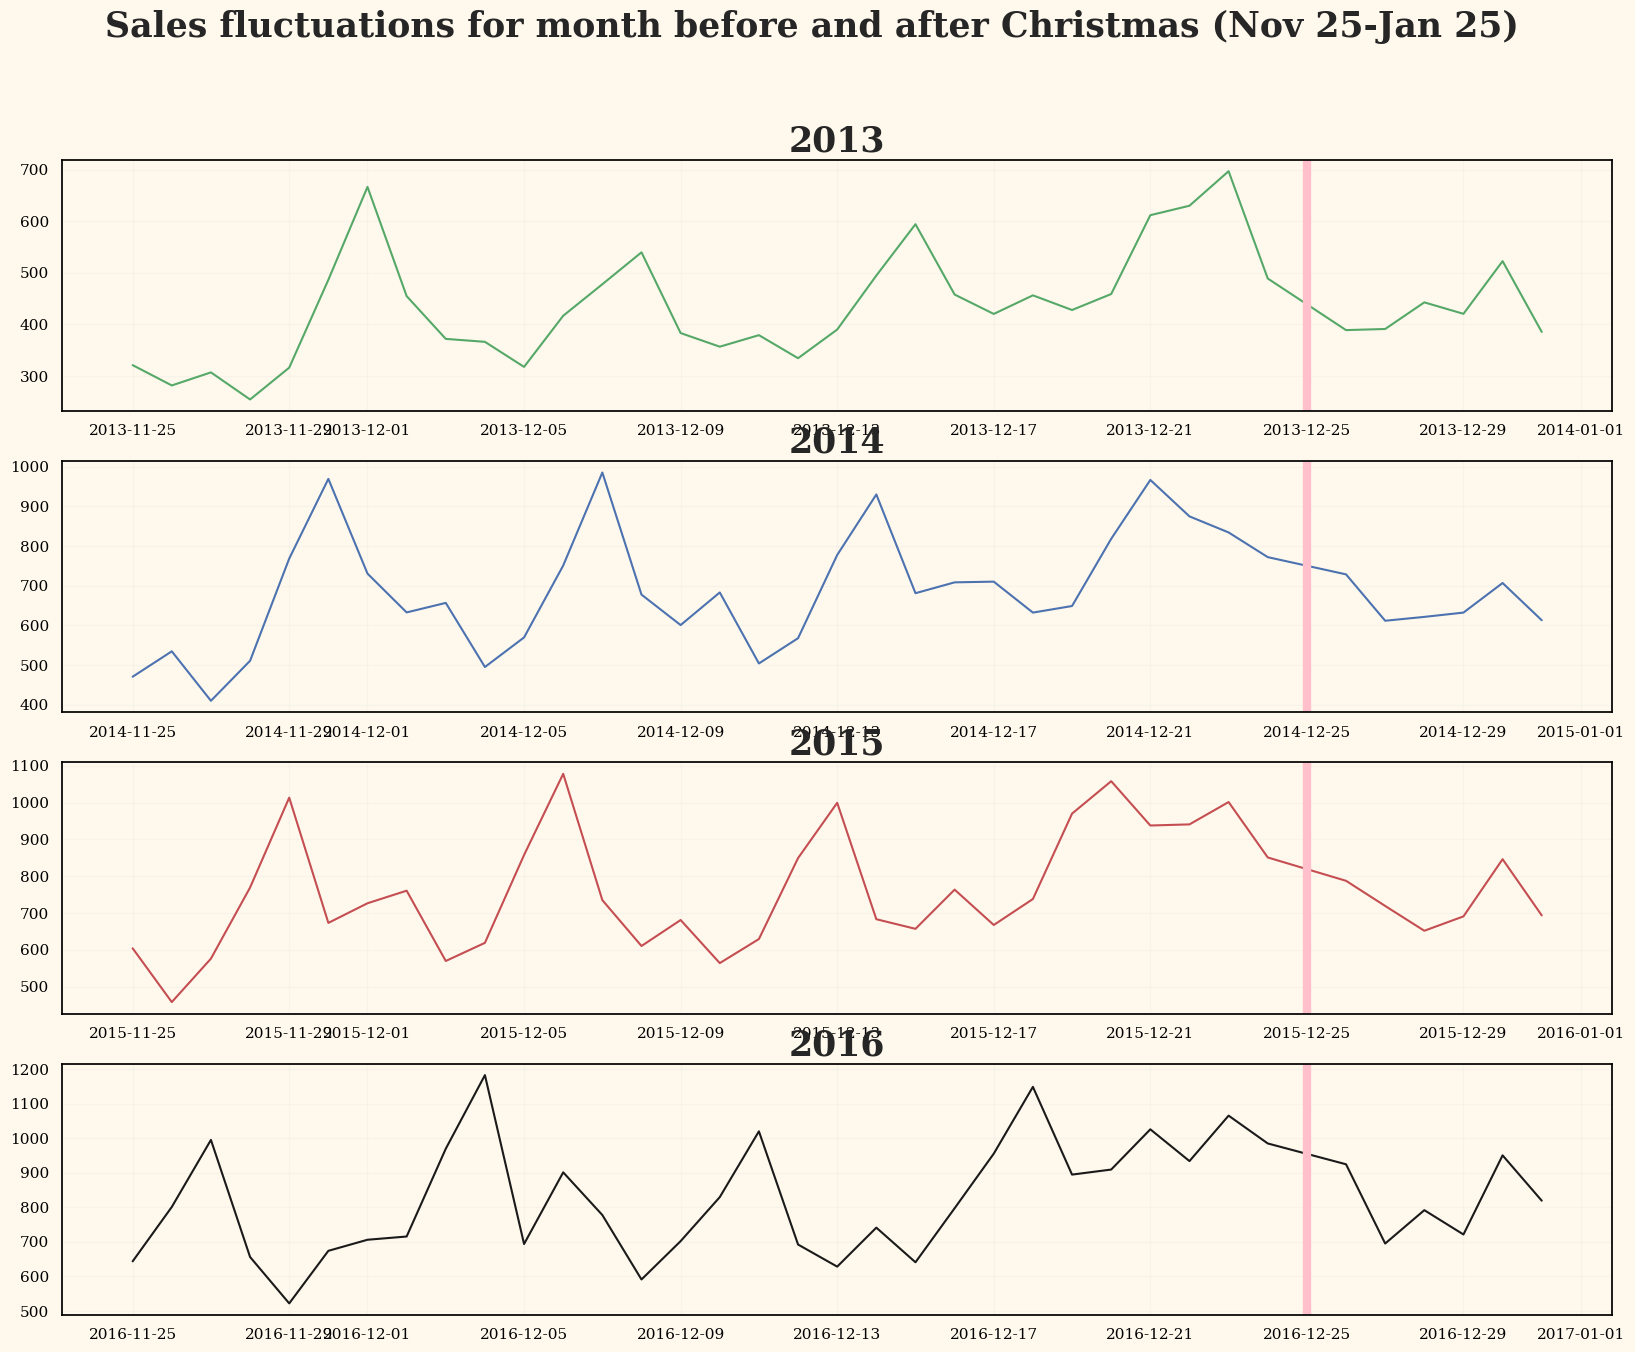

In [20]:
plt.subplots(nrows=2, ncols=2, figsize=(20, 15), gridspec_kw={'height_ratios': [2, 2], 'width_ratios': [2, 2]})
                         
plt.subplot(4,1,1)
plt.plot(df_2013[(df_2013['id'] >= idx_2013_1125) & (df_2013['id'] <= idx_2014_0125)].groupby('date')[['sales']].mean(), 'g')
plt.title('2013', fontweight='bold', fontsize=25)
x_value = mdates.date2num(dt.datetime(2013, 12, 25))
plt.axvline(x=x_value, linewidth=6, color='pink', linestyle='-')

plt.subplot(4,1,2)
plt.plot(df_2014[(df_2014['id'] >= idx_2014_1125) & (df_2014['id'] <= idx_2015_0125)].groupby('date')[['sales']].mean(), 'b')
plt.title('2014', fontweight='bold', fontsize=25)
x_value = mdates.date2num(dt.datetime(2014, 12, 25))
plt.axvline(x=x_value, linewidth=6, color='pink', linestyle='-')

plt.subplot(4,1,3)
plt.plot(df_2015[(df_2015['id'] >= idx_2015_1125) & (df_2015['id'] <= idx_2016_0125)].groupby('date')[['sales']].mean(), 'r')
plt.title('2015', fontweight='bold', fontsize=25)
x_value = mdates.date2num(dt.datetime(2015, 12, 25))
plt.axvline(x=x_value, linewidth=6, color='pink', linestyle='-')

plt.subplot(4,1,4)
plt.plot(df_2016[(df_2016['id'] >= idx_2016_1125) & (df_2016['id'] <= idx_2017_0125)].groupby('date')[['sales']].mean(), 'k')
plt.title('2016', fontweight='bold', fontsize=25)
x_value = mdates.date2num(dt.datetime(2016, 12, 25))
plt.axvline(x=x_value, linewidth=6, color='pink', linestyle='-')

plt.suptitle('Sales fluctuations for month before and after Christmas (Nov 25-Jan 25)', fontweight='bold', fontsize=25)
plt.show()

In [21]:
df_total_a = pd.concat([df_2013[(df_2013['id'] >= idx_2013_1125) & (df_2013['id'] <= idx_2014_0125)].groupby('date')[['sales']].mean(), df_2014[(df_2014['id'] >= idx_2014_1125) & (df_2014['id'] <= idx_2015_0125)].groupby('date')[['sales']].mean()])
df_total_a = pd.concat([df_total_a, df_2015[(df_2015['id'] >= idx_2015_1125) & (df_2015['id'] <= idx_2016_0125)].groupby('date')[['sales']].mean()])
df_total_a = pd.concat([df_total_a, df_2016[(df_2016['id'] >= idx_2016_1125) & (df_2016['id'] <= idx_2017_0125)].groupby('date')[['sales']].mean()])
print(df_total_a.shape)
df_total_a.head()

(144, 1)


,sales
date,
2013-11-25,320.797849
2013-11-26,281.400894
2013-11-27,306.716798
2013-11-28,254.177084
2013-11-29,315.942571


In [22]:
start_date = '2013-11-25'
end_date = '2017-01-25'
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
df = pd.DataFrame(index=date_range)
df.index.name = 'date'
df.head()

""
date
2013-11-25
2013-11-26
2013-11-27
2013-11-28
2013-11-29


In [23]:
df_total_a = pd.merge(df, df_total_a, how='left', on='date')
df_total_a.head()

,sales
date,
2013-11-25,320.797849
2013-11-26,281.400894
2013-11-27,306.716798
2013-11-28,254.177084
2013-11-29,315.942571


In [24]:
df_total_a.shape

(1158, 1)

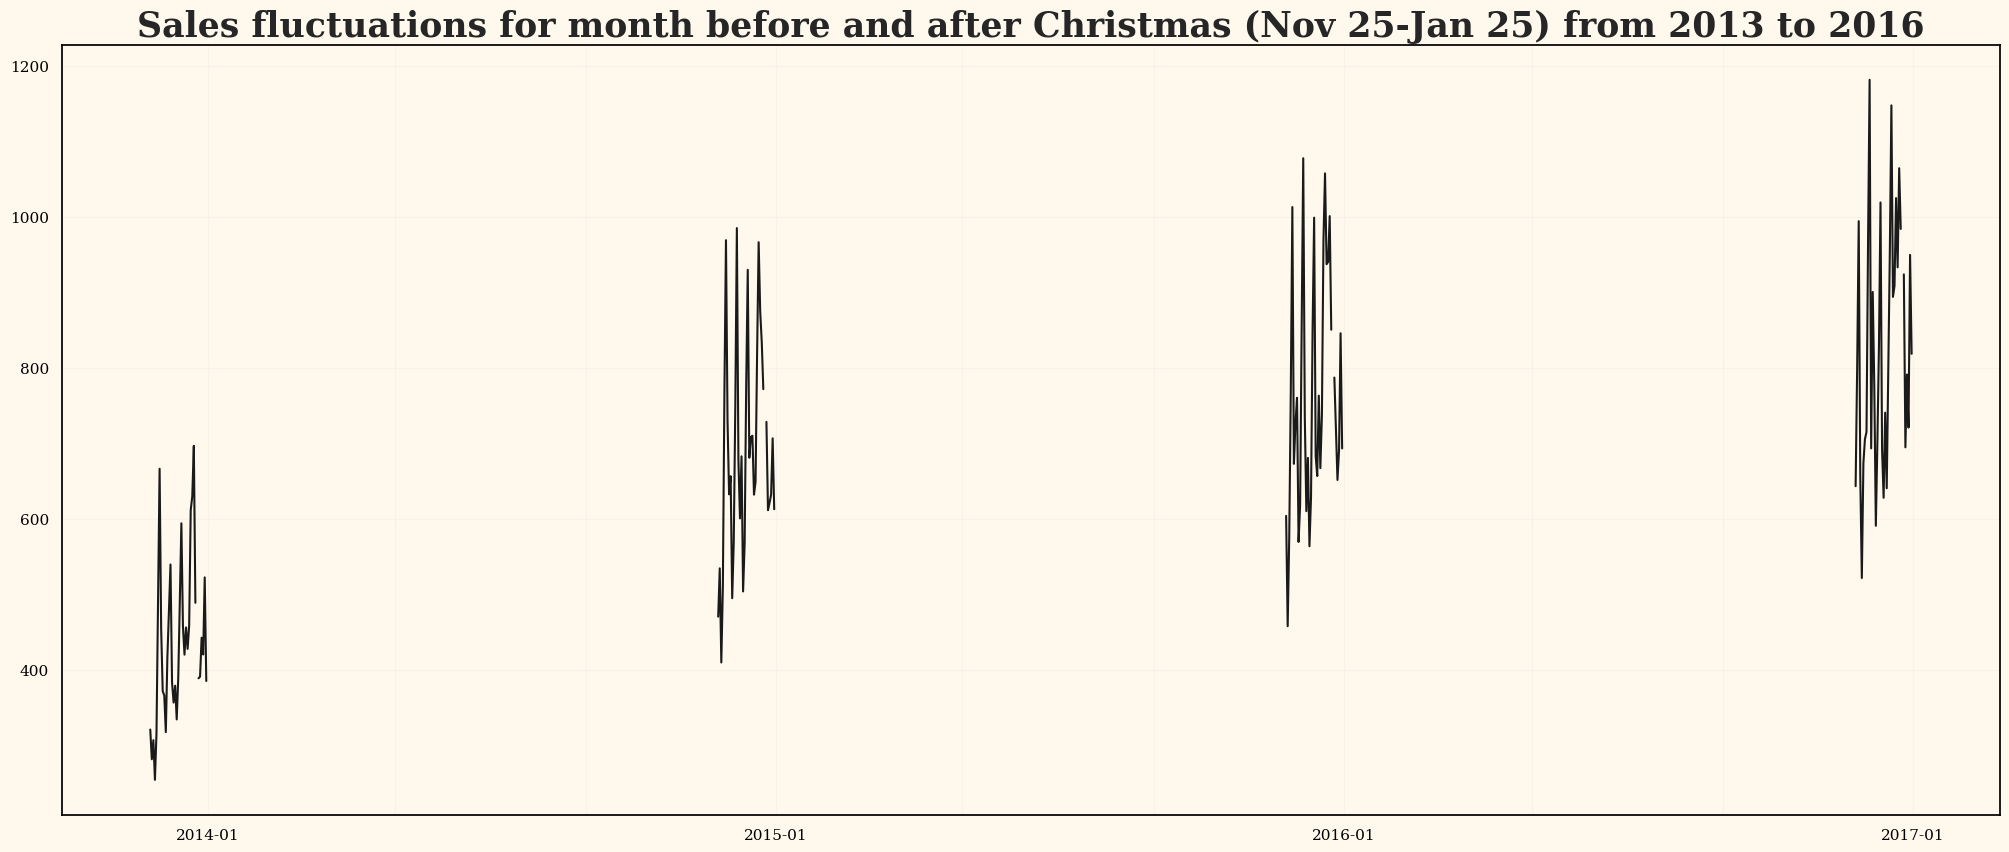

In [25]:
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

plt.figure(figsize=(25,10))
plt.plot(df_total_a, 'k')
plt.title('Sales fluctuations for month before and after Christmas (Nov 25-Jan 25) from 2013 to 2016', fontweight='bold', fontsize=25)
plt.xticks(['2014-01', '2014-05', '2014-09', '2015-01', '2015-05', '2015-09', '2016-01', '2016-05', '2016-09', '2017-01'], ['2014-01', '', '', '2015-01', '', '', '2016-01', '', '', '2017-01'])
plt.show()

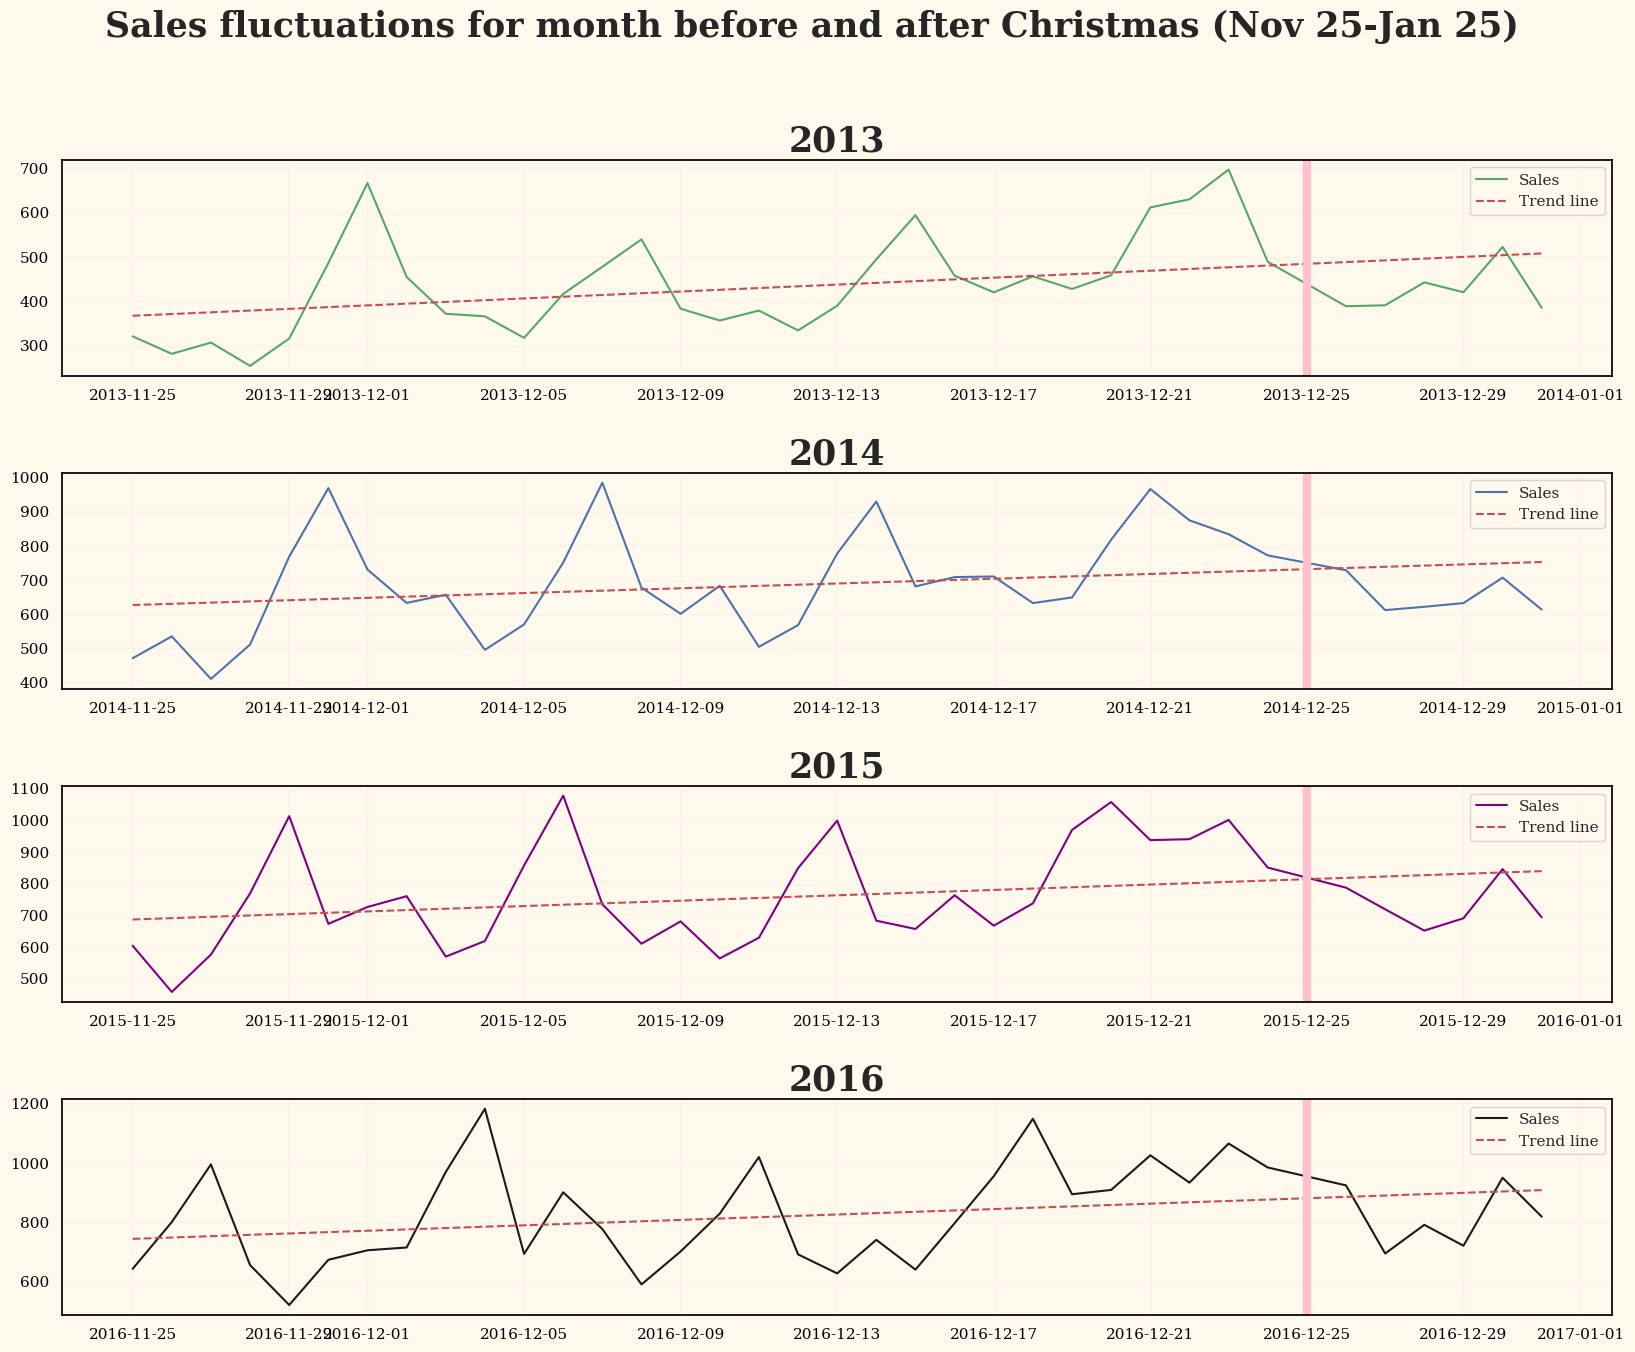

In [26]:
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

plt.subplots(nrows=2, ncols=2, figsize=(20, 15), gridspec_kw={'height_ratios': [2, 2], 'width_ratios': [2, 2]})
plt.subplots_adjust(hspace=0.45)

plt.subplot(4,1,1)

df = df_2013[(df_2013['id'] >= idx_2013_1125) & (df_2013['id'] <= idx_2014_0125)].groupby('date')[['sales']].mean()
df = df.reset_index()

# x, y 데이터 추출
x = df['date']
y = df['sales'].values

df['date_float'] = df['date'].astype(np.int64) / 10**9
result = df['date_float'] + df['sales']

# 1차 함수 추세선 계산
z = np.polyfit(result, y, 1)
p = np.poly1d(z)

# 그래프 그리기
plt.plot(x, y, 'g')
plt.plot(x, p(result), 'r--')
plt.title('2013', fontweight='bold', fontsize=25)
plt.legend(['Sales', 'Trend line'])

x_value = mdates.date2num(dt.datetime(2013, 12, 25))
plt.axvline(x=x_value, linewidth=6, color='pink', linestyle='-')



plt.subplot(4,1,2)

df = df_2014[(df_2014['id'] >= idx_2014_1125) & (df_2014['id'] <= idx_2015_0125)].groupby('date')[['sales']].mean()
df = df.reset_index()

# x, y 데이터 추출
x = df['date']
y = df['sales'].values

df['date_float'] = df['date'].astype(np.int64) / 10**9
result = df['date_float'] + df['sales']

# 1차 함수 추세선 계산
z = np.polyfit(result, y, 1)
p = np.poly1d(z)

# 그래프 그리기
plt.plot(x, y, 'b')
plt.plot(x, p(result), 'r--')
plt.title('2014', fontweight='bold', fontsize=25)
plt.legend(['Sales', 'Trend line'])

x_value = mdates.date2num(dt.datetime(2014, 12, 25))
plt.axvline(x=x_value, linewidth=6, color='pink', linestyle='-')



plt.subplot(4,1,3)

df = df_2015[(df_2015['id'] >= idx_2015_1125) & (df_2015['id'] <= idx_2016_0125)].groupby('date')[['sales']].mean()
df = df.reset_index()

# x, y 데이터 추출
x = df['date']
y = df['sales'].values

df['date_float'] = df['date'].astype(np.int64) / 10**9
result = df['date_float'] + df['sales']

# 1차 함수 추세선 계산
z = np.polyfit(result, y, 1)
p = np.poly1d(z)

# 그래프 그리기
plt.plot(x, y, 'purple')
plt.plot(x, p(result), 'r--')
plt.title('2015', fontweight='bold', fontsize=25)
plt.legend(['Sales', 'Trend line'])

x_value = mdates.date2num(dt.datetime(2015, 12, 25))
plt.axvline(x=x_value, linewidth=6, color='pink', linestyle='-')



plt.subplot(4,1,4)

df = df_2016[(df_2016['id'] >= idx_2016_1125) & (df_2016['id'] <= idx_2017_0125)].groupby('date')[['sales']].mean()
df = df.reset_index()

# x, y 데이터 추출
x = df['date']
y = df['sales'].values

df['date_float'] = df['date'].astype(np.int64) / 10**9
result = df['date_float'] + df['sales']

# 1차 함수 추세선 계산
z = np.polyfit(result, y, 1)
p = np.poly1d(z)

# 그래프 그리기
plt.plot(x, y, 'k')
plt.plot(x, p(result), 'r--')
plt.title('2016', fontweight='bold', fontsize=25)
plt.legend(['Sales', 'Trend line'])

x_value = mdates.date2num(dt.datetime(2016, 12, 25))
plt.axvline(x=x_value, linewidth=6, color='pink', linestyle='-')

plt.suptitle('Sales fluctuations for month before and after Christmas (Nov 25-Jan 25)', fontweight='bold', fontsize=25)
plt.show()